In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
data = pd.read_csv("candidate.csv")
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Tweets,len,ID,Date,Source,Likes,RT
0,NDA Government is honoured to have undertaken ...,140,1092709705909071872,2019-02-05 09:01:10,Twitter Web Client,14005,3223
1,"India is home to a dynamic middle class, which...",139,1092709704340402176,2019-02-05 09:01:09,Twitter Web Client,19746,4303
2,"Today, on #WorldCancerDay we reiterate our com...",139,1092355257496027136,2019-02-04 09:32:43,Twitter Web Client,13104,2508
3,Congratulated @DrKrishanMiddha Ji for the rema...,140,1092353308654620672,2019-02-04 09:24:58,Twitter Web Client,19282,3314
4,I salute all those who are valiantly fighting ...,140,1092352936825344000,2019-02-04 09:23:29,Twitter Web Client,28141,5306


In [3]:
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RT'])
fav_min = np.min(data['Likes'])
fav = data[data.Likes == fav_max].index[0]
rt = data[data.RT == rt_max].index[0]
fav_tweet = data['Tweets'][fav]
rt_tweet = data['Tweets'][rt]
least_fav = data['Tweets'][fav_min]

In [4]:
print(f"The tweet with maximum likes is : \n{fav_tweet}")
print(f"Number of likes: {fav_max}")
print(f"\nThe tweet with more retweets is: \n{rt_tweet}")
print(f"Number of retweets: {rt_max}")
print(f"\nThe tweet with minimum likes is : \n{least_fav}")
print(f"Number of likes: {fav_min}")

The tweet with maximum likes is : 
Happy Republic Day to all fellow Indians. 

सभी देशवासियों को #गणतंत्रदिवस की शुभकामनाएं।

जय हिन्द!
Number of likes: 79420

The tweet with more retweets is: 
They got together in Kolkata with no agenda but to stop BJP.

They talk of democracy in a state where the ruling pa… https://t.co/LP1UbBxuJW
Number of retweets: 20230

The tweet with minimum likes is : 
NDA Government is honoured to have undertaken numerous steps for the wellbeing of the middle class. From a friendli… https://t.co/2cTfnoj8pE
Number of likes: 0


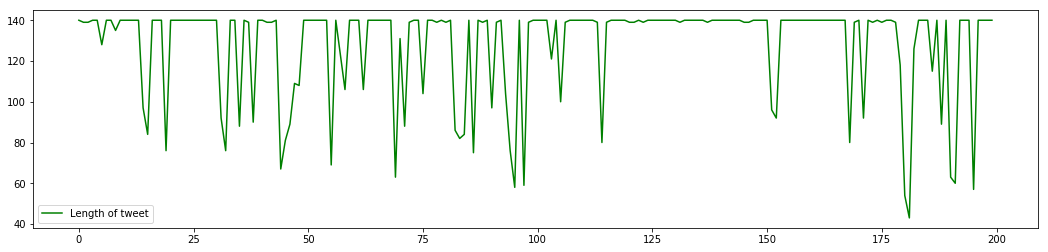

In [5]:
len_t = pd.Series(data = data['len'].values)
len_t.plot(figsize=(18,4),label="Length of tweet", color='g', legend=True)

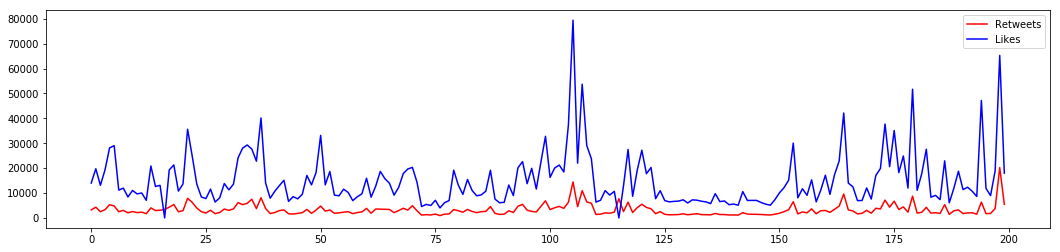

In [6]:
RT_t = pd.Series(data = data['RT'].values)
fav_t = pd.Series(data = data['Likes'].values)
RT_t.plot(figsize =(18,4),label="Retweets", color ='r',legend=True)
fav_t.plot(figsize=(18,4), label="Likes", color = 'b', legend=True)

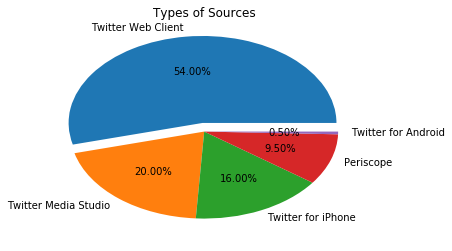

In [7]:
Sources = data['Source'].value_counts()
explode =(0.1,0,0,0,0)
plt.pie(Sources.values,labels=Sources.index, explode=explode, autopct='%.2f%%')
plt.title("Types of Sources")
plt.show()

In [8]:
# function to clean tweet and to perform sentiment analysis
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",tweet).split())
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity >0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
data['SA'] = np.array([analyze_sentiment(tweet) for tweet in data["Tweets"]])
data['tidy tweet'] = np.array([clean_tweet(tweet) for tweet in data['Tweets']])
data.head()

,Tweets,len,ID,Date,Source,Likes,RT,SA,tidy tweet
0,NDA Government is honoured to have undertaken ...,140,1092709705909071872,2019-02-05 09:01:10,Twitter Web Client,14005,3223,0,NDA Government is honoured to have undertaken ...
1,"India is home to a dynamic middle class, which...",139,1092709704340402176,2019-02-05 09:01:09,Twitter Web Client,19746,4303,1,India is home to a dynamic middle class which ...
2,"Today, on #WorldCancerDay we reiterate our com...",139,1092355257496027136,2019-02-04 09:32:43,Twitter Web Client,13104,2508,1,Today on WorldCancerDay we reiterate our commi...
3,Congratulated @DrKrishanMiddha Ji for the rema...,140,1092353308654620672,2019-02-04 09:24:58,Twitter Web Client,19282,3314,1,Congratulated Ji for the remarkable win in Jin...
4,I salute all those who are valiantly fighting ...,140,1092352936825344000,2019-02-04 09:23:29,Twitter Web Client,28141,5306,1,I salute all those who are valiantly fighting ...


In [9]:
positive =[]
negative =[]
neutral =[]
for value in data['SA']:
    if value >0:
        positive.append(data['Tweets'])
    elif value <0:
        negative.append(data['Tweets'])
    else:
        neutral.append(data['Tweets'])

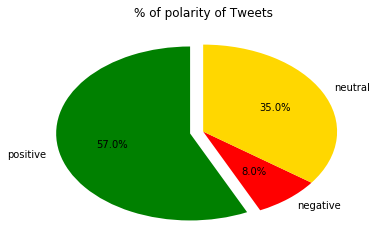

In [10]:
tweet_count =[len(positive),len(negative),len(neutral)]
labels = ["positive", "negative", "neutral"]
colors =['g','r','gold']
explode=(0.1,0,0)
plt.pie(tweet_count,labels=labels,explode=explode,colors=colors, autopct="%0.1f%%", startangle=90)
plt.title("% of polarity of Tweets")
plt.show()

In [11]:
import nltk

In [12]:
token_tweet = data['tidy tweet'].apply(lambda x: x.split())
token_tweet.head()

0    [NDA, Government, is, honoured, to, have, unde...
1    [India, is, home, to, a, dynamic, middle, clas...
2    [Today, on, WorldCancerDay, we, reiterate, our...
3    [Congratulated, Ji, for, the, remarkable, win,...
4    [I, salute, all, those, who, are, valiantly, f...
Name: tidy tweet, dtype: object

In [13]:
for i in range(len(token_tweet)):
    token_tweet[i] = ' '.join(token_tweet[i])
data['tidy tweet'] = token_tweet
data.head()

,Tweets,len,ID,Date,Source,Likes,RT,SA,tidy tweet
0,NDA Government is honoured to have undertaken ...,140,1092709705909071872,2019-02-05 09:01:10,Twitter Web Client,14005,3223,0,NDA Government is honoured to have undertaken ...
1,"India is home to a dynamic middle class, which...",139,1092709704340402176,2019-02-05 09:01:09,Twitter Web Client,19746,4303,1,India is home to a dynamic middle class which ...
2,"Today, on #WorldCancerDay we reiterate our com...",139,1092355257496027136,2019-02-04 09:32:43,Twitter Web Client,13104,2508,1,Today on WorldCancerDay we reiterate our commi...
3,Congratulated @DrKrishanMiddha Ji for the rema...,140,1092353308654620672,2019-02-04 09:24:58,Twitter Web Client,19282,3314,1,Congratulated Ji for the remarkable win in Jin...
4,I salute all those who are valiantly fighting ...,140,1092352936825344000,2019-02-04 09:23:29,Twitter Web Client,28141,5306,1,I salute all those who are valiantly fighting ...


In [14]:
pos_word =' '.join([text for text in data['tidy tweet'][data['SA'] == 1]])
neutral_word=' '.join([text for text in data['tidy tweet'][data['SA'] == 0]])

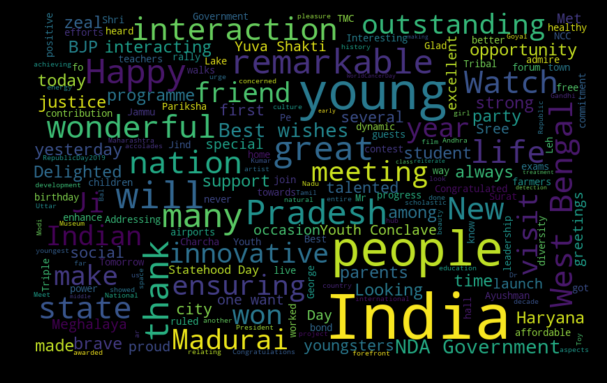

In [15]:
wordcloud = WordCloud(width=800, height=500, max_font_size=90).generate(pos_word)
plt.figure(figsize=(10, 7), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('wordcloud.png', facecolor='r', bbox_inches='tight')

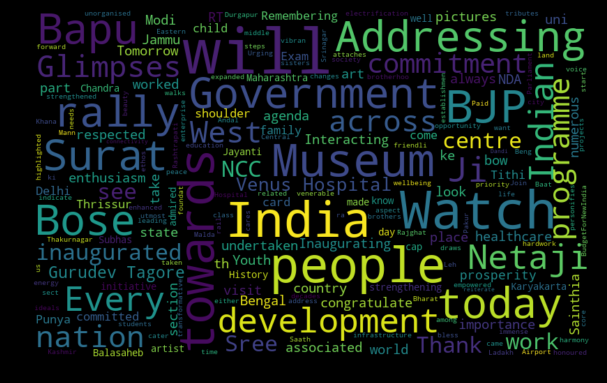

In [16]:
wordcloud2 = WordCloud(width=800, height=500, max_font_size=90).generate(neutral_word)
plt.figure(figsize=(10, 7), facecolor='k')
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')
plt.savefig('wordcloud2.png', facecolor='r', bbox_inches='tight')

In [17]:
public_tweet = pd.read_csv("public_tweet.csv")
public_tweet.head()

,Date,Tweets
0,2019-02-06 07:02:08,b'RT @drshamamohd: 4000 graduates including en...
1,2019-02-06 07:00:46,b'We want #Modi ji in 2k19\nFor NEW INDIA \xf0...
2,2019-02-06 07:00:21,b'RT @drshamamohd: 4000 graduates including en...
3,2019-02-06 06:59:36,b'RT @drshamamohd: 4000 graduates including en...
4,2019-02-06 06:58:39,b'RT @drshamamohd: 4000 graduates including en...


In [18]:
# function to clean tweet and to perform sentiment analysis

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",tweet).split())
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity >0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
public_tweet['SA'] = np.array([analyze_sentiment(tweet) for tweet in public_tweet["Tweets"]])
public_tweet['tidy tweet'] = np.array([clean_tweet(tweet) for tweet in public_tweet['Tweets']])

In [19]:
pos =[]
neg =[]
neu =[]
for value in public_tweet['SA']:
    if value >0:
        pos.append(public_tweet['Tweets'])
    elif value <0:
        neg.append(public_tweet['Tweets'])
    else:
        neu.append(public_tweet['Tweets'])

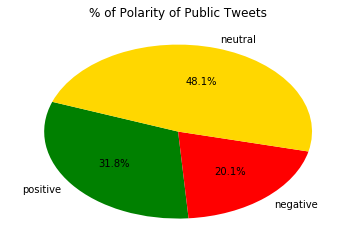

In [20]:
public_tweet_count =[len(pos),len(neg),len(neu)]
labels = ["positive", "negative", "neutral"]
colors =['green','red','gold']
plt.pie(public_tweet_count,labels=labels,colors=colors, autopct="%0.1f%%", startangle=160)
plt.title("% of Polarity of Public Tweets")
plt.show()

